In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:\\Jupyter\\diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 769 entries, 0 to 768
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               769 non-null    int64  
 1   Glucose                   769 non-null    int64  
 2   BloodPressure             769 non-null    int64  
 3   SkinThickness             769 non-null    int64  
 4   Insulin                   769 non-null    int64  
 5   BMI                       769 non-null    float64
 6   DiabetesPedigreeFunction  769 non-null    float64
 7   Age                       769 non-null    int64  
 8   Outcome                   769 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.2 KB


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000
mean,3.840052,120.897269,69.115735,20.509753,79.697009,31.998179,0.471590,33.269181,0.349805
std,3.370237,31.951886,19.345296,15.959020,115.203999,7.880557,0.331208,11.778737,0.477219
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,29.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.000000,36.600000,0.626000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.columns = df.columns.str.strip()
print("Column Names:", df.columns)

Column Names: Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


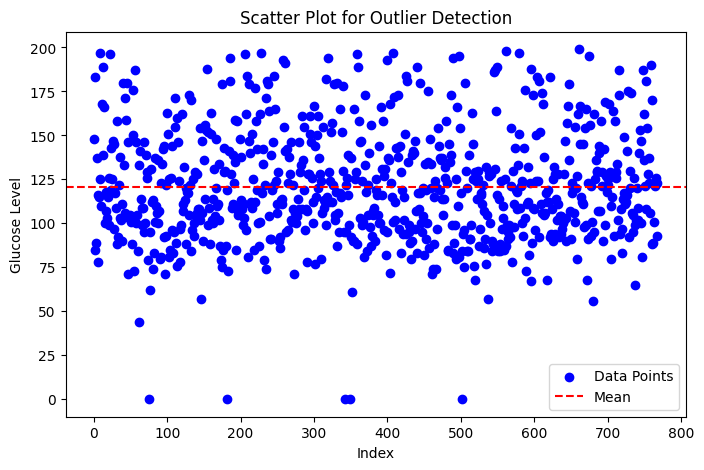

In [9]:
plt.figure(figsize=(8,5))
plt.scatter(range(len(df)), df['Glucose'], color='blue', label='Data Points')
plt.axhline(y=df['Glucose'].mean(), color='red', linestyle='--', label='Mean')
plt.xlabel("Index")
plt.ylabel("Glucose Level")
plt.title("Scatter Plot for Outlier Detection")
plt.legend()
plt.show()

In [16]:
import numpy as np
from scipy.stats import zscore
z_score = np.abs(zscore(df.select_dtypes(include=["number"])))
cleaned = df[(z_score < 3).all(axis=1)]
print("Dataset Shape after removing outliers:", cleaned.shape)

Dataset Shape after removing outliers: (689, 9)


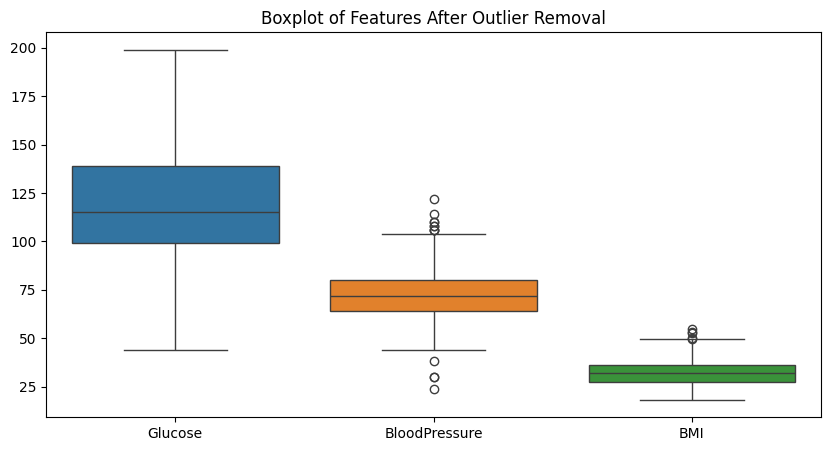

In [17]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=cleaned[['Glucose','BloodPressure','BMI']])
plt.title("Boxplot of Features After Outlier Removal")
plt.show()

In [20]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
X = df.drop(columns=['Outcome'])
y = df['Outcome']
model = RandomForestRegressor()
rfe = RFE(model, n_features_to_select=3)
X_selected = rfe.fit_transform(X, y)
selected_features = X.columns[rfe.support_]
print("Selected Features using RFE: ", selected_features)


Selected Features using RFE:  Index(['Glucose', 'BMI', 'DiabetesPedigreeFunction'], dtype='object')


In [21]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X, y)
importance = np.abs(lasso.coef_)
selected_features = X.columns[importance > 0]
print("Selected Features using Lasso: ", selected_features)

Selected Features using Lasso:  Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Age'],
      dtype='object')


In [24]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=3)
X_resampled, y_resampled = smote.fit_resample(X, y)
df_balanced = pd.concat([pd.DataFrame(X_resampled, columns=X.columns),
                         pd.DataFrame(y_resampled, columns=['Outcome'])], axis=1)
print("Class distribution after SMOTE:")
print(df_balanced['Outcome'].value_counts())

Class distribution after SMOTE:
Outcome
1    500
0    500
Name: count, dtype: int64


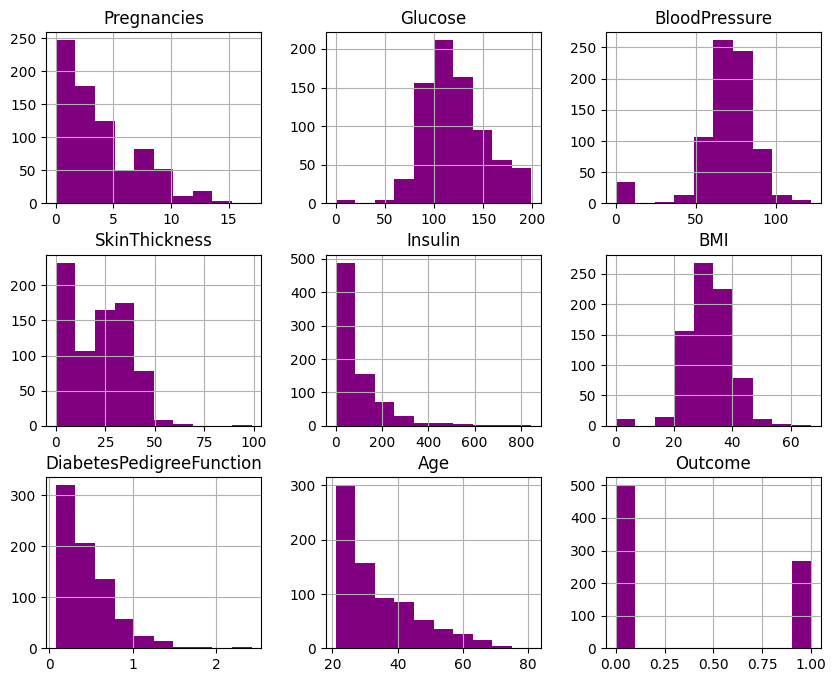

In [25]:
df.hist(bins=10, figsize=(10, 8), color='purple')
plt.show()

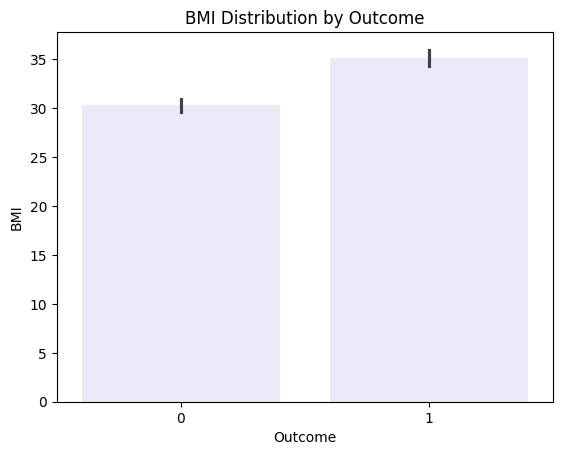

In [28]:
sns.barplot(x='Outcome', y='BMI', data=df, color='lavender')
plt.title("BMI Distribution by Outcome")
plt.show()


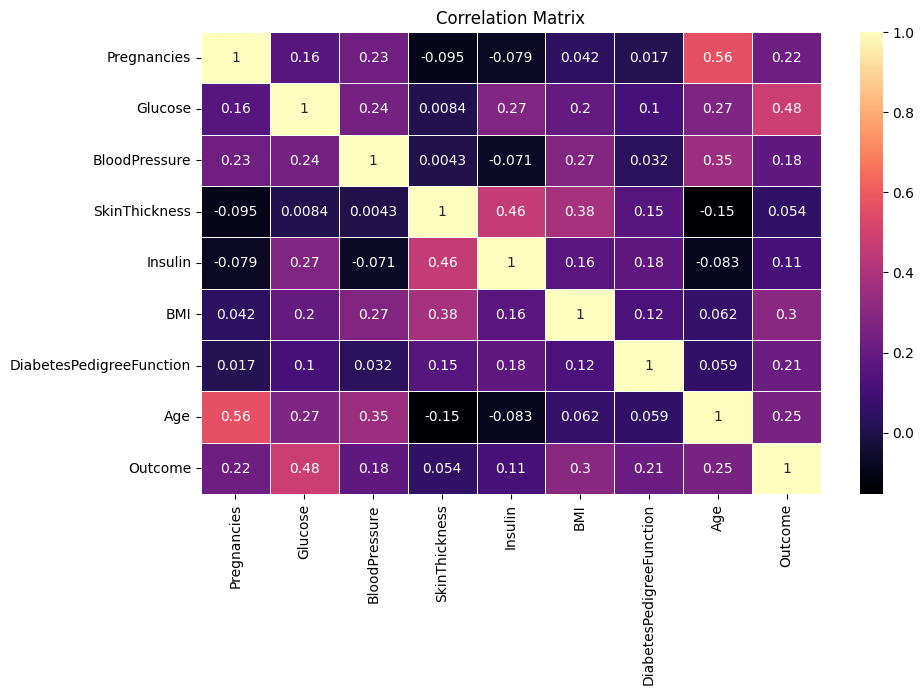

In [29]:
plt.figure(figsize=(10,6))
sns.heatmap(cleaned.corr(), annot=True, cmap="magma", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()